In [6]:
from pycalphad import Database, equilibrium,calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA


dbf=Database('ternary_only_Viitala.dat')

ZN =  v.Species('ZN+2.0', constituents={'ZN': 1.0}, charge=2)
FE2 = v.Species('FE+2.0', constituents={'FE': 1.0}, charge=2)
FE3 = v.Species('FE+3.0', constituents={'FE': 1.0}, charge=3)
CU1 = v.Species('CU+1.0', constituents={'CU': 1.0}, charge=1)
CU2 = v.Species('CU+2.0', constituents={'CU': 1.0}, charge=2)
CL =  v.Species('CL-1.0', constituents={'CL': 1.0}, charge=-1)

mod = ModelMQMQA(dbf,['CU','ZN','FE','CL'], 'LIQUIDSOLN')

subs_dict ={mod._p(CU1,CU1,CL,CL): 9.57706456e-02,
            mod._p(CU1,CU2,CL,CL): 1.00000000e-14,
            mod._p(CU1,FE2,CL,CL): 2.14917980e-01,
            mod._p(CU1,FE3,CL,CL): 4.10073359e-12,
            mod._p(CU1,ZN,CL,CL):  2.60207395e-01,
            mod._p(CU2,CU2,CL,CL): 1.00000000e-14,
            mod._p(CU2,FE2,CL,CL): 1.00000000e-14,
            mod._p(CU2,FE3,CL,CL): 1.00000000e-14,
            mod._p(CU2,ZN,CL,CL):  1.00000000e-14,
            mod._p(FE2,FE2,CL,CL): 1.24082313e-01,
            mod._p(FE2,FE3,CL,CL): 6.29677197e-12,
            mod._p(FE2,ZN,CL,CL): 2.03584061e-01,
            mod._p(FE3,FE3,CL,CL): 1.00000000e-14,
            mod._p(FE3,ZN,CL,CL): 1.05425777e-11,
            mod._p(ZN,ZN,CL,CL): 1.01437605e-01,
            v.T: 600
            }


ex=float(mod.models['xsmix'].subs(subs_dict))
TSM_pycalphad =float(mod.models['idmix'].subs(subs_dict))
#F =mod.models['ref']
TF =float(mod.models['ref'].subs(subs_dict))

#moles=float(ex)

G=ex+TSM_pycalphad+TF

print(G)

LIQUIDSOLN
CUCL
FEZNSOLN
ZNFESOLN
CL2(G)
FE_BCC(S)
CU_SOLID(S)
ZN_SOLID(S)
PB_SOLID(S)
CUCL(S)
CUCL2(S)
ZNCL2(S)
FECL3(S)
FECL2(S)
PBCL2(S)


TypeError: 'set' object is not subscriptable

In [1]:
from pycalphad import Database,equilibrium, calculate, variables as v
from pycalphad import Model
from sympy import exp, log, Abs, Add, And, Float, Mul, Piecewise, Pow, S, sin, StrictGreaterThan, Symbol, zoo, oo, nan
from numpy import log as ln
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf=Database('VIITALA_DBF.dat')

comps = ['CU','FE','ZN','CL']  # other pure element component names that you want
#    phases = ['CL2(G)', 'FE_BCC(S)','CU_SOLID(S)','ZN_SOLID(S)','PB_SOLID(S)','ZNFESOLN', 'FEZNSOLN', 'LIQUIDSOLN', 'CUCL']
phases = ['LIQUIDSOLN','CL2(G)']
conds = {v.N: 1, v.P: 101325, v.T: 600, v.X('FE'): 0.125, v.X('CU'): 0.125,v.X('CL'): 0.6251}

model = {'LIQUIDSOLN': ModelMQMQA}
eq = equilibrium(dbf , comps, phases, conds, model=model)

mod = ModelMQMQA(dbf,['CU','ZN','FE','CL'], 'LIQUIDSOLN')

print(eq.GM)
#print(eq.Y)
#print(mod.constituents)

LIQUIDSOLN
CUCL
FEZNSOLN
ZNFESOLN
CL2(G)
FE_BCC(S)
CU_SOLID(S)
ZN_SOLID(S)
PB_SOLID(S)
CUCL(S)
CUCL2(S)
ZNCL2(S)
FECL3(S)
FECL2(S)
PBCL2(S)
<xarray.DataArray 'GM' (N: 1, P: 1, T: 1, X_CL: 1, X_CU: 1, X_FE: 1)>
array([[[[[[-138875.01369679]]]]]])
Coordinates:
  * N        (N) float64 1.0
  * P        (P) float64 1.013e+05
  * T        (T) float64 600.0
  * X_CL     (X_CL) float64 0.6251
  * X_CU     (X_CU) float64 0.125
  * X_FE     (X_FE) float64 0.125


LIQUIDSOLN
CUCL
FEZNSOLN
ZNFESOLN
CL2(G)
FE_BCC(S)
CU_SOLID(S)
ZN_SOLID(S)
PB_SOLID(S)
CUCL(S)
CUCL2(S)
ZNCL2(S)
FECL3(S)
FECL2(S)
PBCL2(S)


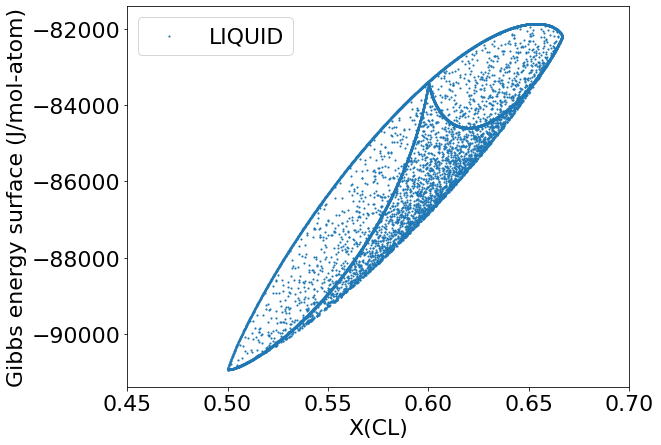

In [2]:
from pycalphad import Database, calculate, Model, ReferenceState, variables as v
import matplotlib.pyplot as plt
from pycalphad.models.model_mqmqa import ModelMQMQA

dbf = Database("ternary_only_Viitala.dat")
comps = ['CU','CL']

model = {'LIQUIDSOLN': ModelMQMQA}


# Calculate HMR for the liquid at 2800 K from X(RE)=0 to X(RE)=1
result = calculate(dbf, comps, 'LIQUIDSOLN', P=101325, T=500, model=model,output='GM')

# Plot
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax.scatter(result.X.sel(component='CL'), result.GM, marker='.', s=5, label='LIQUID')
ax.set_xlim((0, 1))
ax.set_xlabel('X(CL)')
ax.set_ylabel('Gibbs energy surface (J/mol-atom)')

#ax.set_title('Nb-Re LIQUID Mixing Enthalpy')
ax.legend()
plt.xlim(0.45, 0.7)
#plt.ylim(-250000, -215000)
plt.rcParams.update({'font.size': 22})

plt.show()